In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('netflix.csv')
df.drop_duplicates()
df.shape
df.columns
df.head()
df.sort_values(by="release_year",ascending=True)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,NaN,"December 30, 2018",1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...
7790,s7791,Movie,Prelude to War,Frank Capra,NaN,United States,"March 31, 2017",1942,TV-14,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...
8205,s8206,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,"March 31, 2017",1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...
8660,s8661,Movie,Undercover: How to Operate Behind Enemy Lines,John Ford,NaN,United States,"March 31, 2017",1943,TV-PG,61 min,"Classic Movies, Documentaries",This World War II-era training film dramatizes...
8739,s8740,Movie,Why We Fight: The Battle of Russia,"Frank Capra, Anatole Litvak",NaN,United States,"March 31, 2017",1943,TV-PG,82 min,Documentaries,This installment of Frank Capra's acclaimed do...
...,...,...,...,...,...,...,...,...,...,...,...,...
862,s863,TV Show,Special,NaN,"Ryan O'Connell, Jessica Hecht, Punam Patel, Ma...",United States,"May 20, 2021",2021,TV-MA,2 Seasons,TV Comedies,A young gay man with cerebral palsy branches o...
861,s862,Movie,Little Singham Future mein Satakli,Prakash Satam,"Anamaya Verma, Ganesh Divekar, Jigna Bharadhwa...",NaN,"May 20, 2021",2021,TV-Y7,47 min,"Children & Family Movies, Comedies",Little Singham and his crew travel to the year...
857,s858,TV Show,The Neighbor,NaN,"Quim Gutiérrez, Clara Lago, Adrián Pino, Catel...",Spain,"May 21, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Spanish-Language TV Sh...",Self-centered Javier's life gets a bit messy w...
876,s877,TV Show,Alma Matters,NaN,NaN,India,"May 14, 2021",2021,TV-MA,1 Season,"Docuseries, International TV Shows",Alumni of India’s elite academic institutes sh...


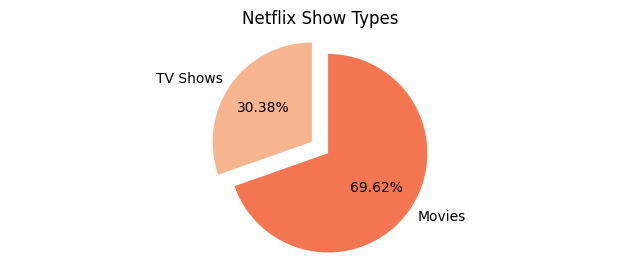

In [3]:
#Pie Chart - Netflix Types

labels = ['TV Shows', 'Movies']
colors = sns.color_palette('rocket_r')
plt.figure(figsize=(8,3))
plt.pie(df['type'].value_counts().sort_values(), labels = labels, colors = colors, autopct='%1.2f%%', explode=[0.1,0.1], startangle=90)
plt.title("Netflix Show Types")
plt.axis('equal')
plt.show()

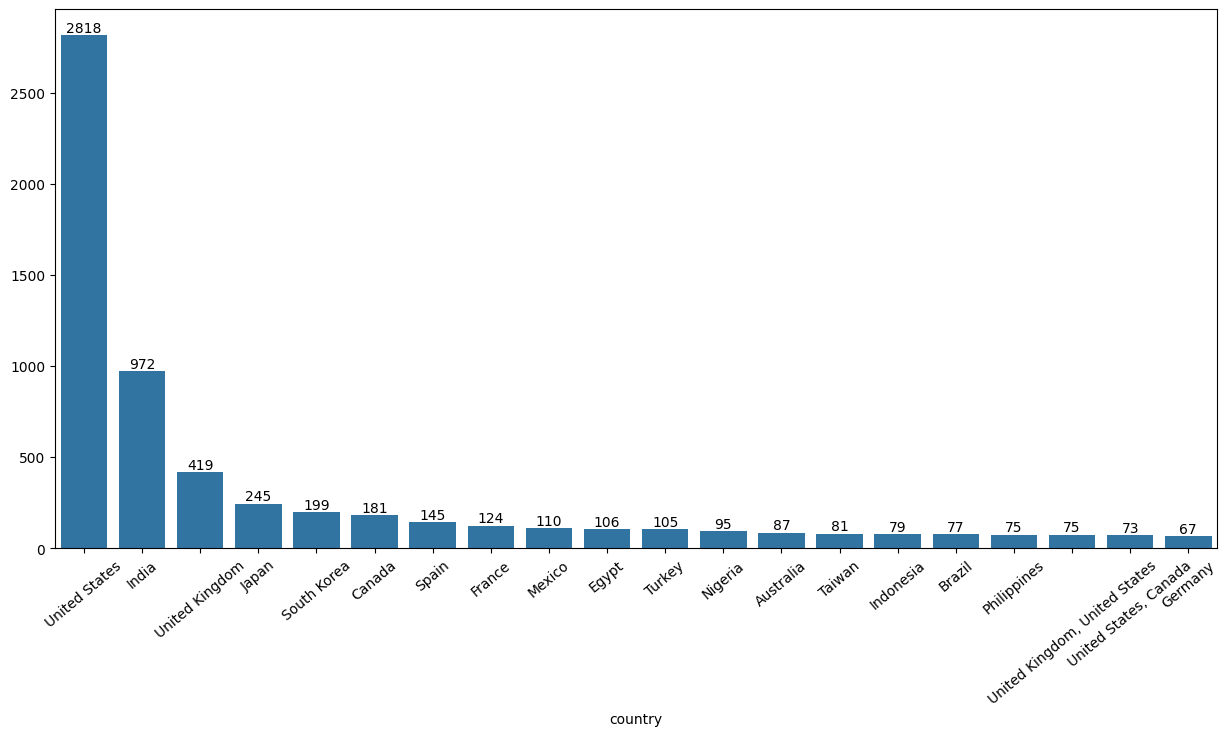

In [4]:
#Graph - Total rankings
plt.figure(figsize=(15,7))
graph = sns.barplot(x=df.country.value_counts()[:20].index , y=df.country.value_counts()[:20].values )

xticks = range(len(df.country.value_counts()[:20].index))
graph.set_xticks(xticks)
graph.set_xticklabels(df.country.value_counts()[:20].index, rotation=40)

for a in graph.containers:
    graph.bar_label(a)

plt.show()

     show_id   type                 title          director  \
0         s1  Movie  Dick Johnson Is Dead   Kirsten Johnson   
9        s10  Movie          The Starling    Theodore Melfi   
27       s28  Movie             Grown Ups      Dennis Dugan   
28       s29  Movie            Dark Skies     Scott Stewart   
41       s42  Movie                  Jaws  Steven Spielberg   
...      ...    ...                   ...               ...   
8791   s8792  Movie           Young Adult     Jason Reitman   
8793   s8794  Movie  Yours, Mine and Ours      Raja Gosnell   
8802   s8803  Movie                Zodiac     David Fincher   
8804   s8805  Movie            Zombieland   Ruben Fleischer   
8805   s8806  Movie                  Zoom      Peter Hewitt   

                                                   cast        country  \
0                                                   NaN  United States   
9     Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...  United States   
27    Adam Sandler, K

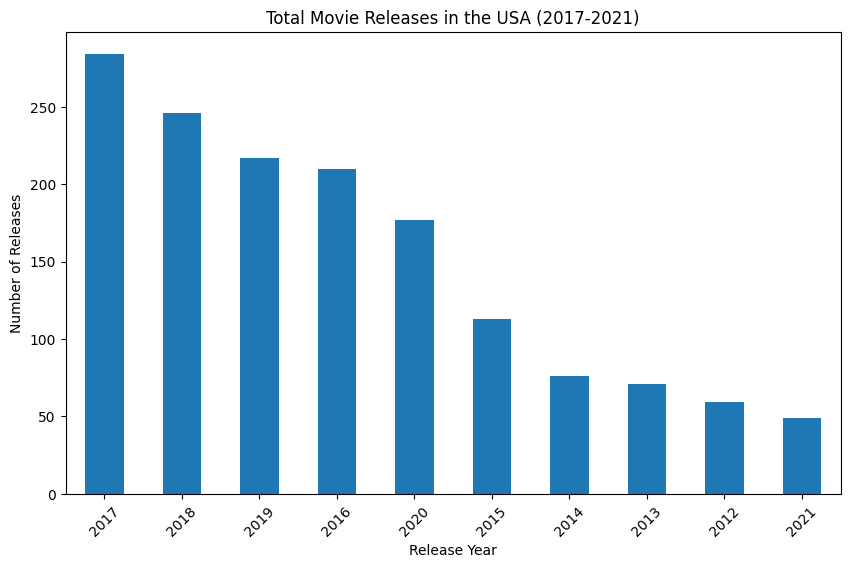

In [10]:
# Filter for movies and select relevant columns
df_movies = df[df['type'] == 'Movie'][['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 
                                       'release_year', 'rating', 'duration', 'listed_in', 'description']]

# Filter for movies in the United States
US = df_movies[df_movies['country'] == 'United States']

# Print the filtered DataFrame for verification
print(US)

# Plot the number of movie releases by year
plt.figure(figsize=(10, 6))
US['release_year'].value_counts(ascending=False).iloc[:10].plot(kind='bar')
plt.title("Total Movie Releases in the USA (2017-2021)")
plt.xlabel("Release Year")
plt.ylabel("Number of Releases")
plt.xticks(rotation=45)
plt.show()

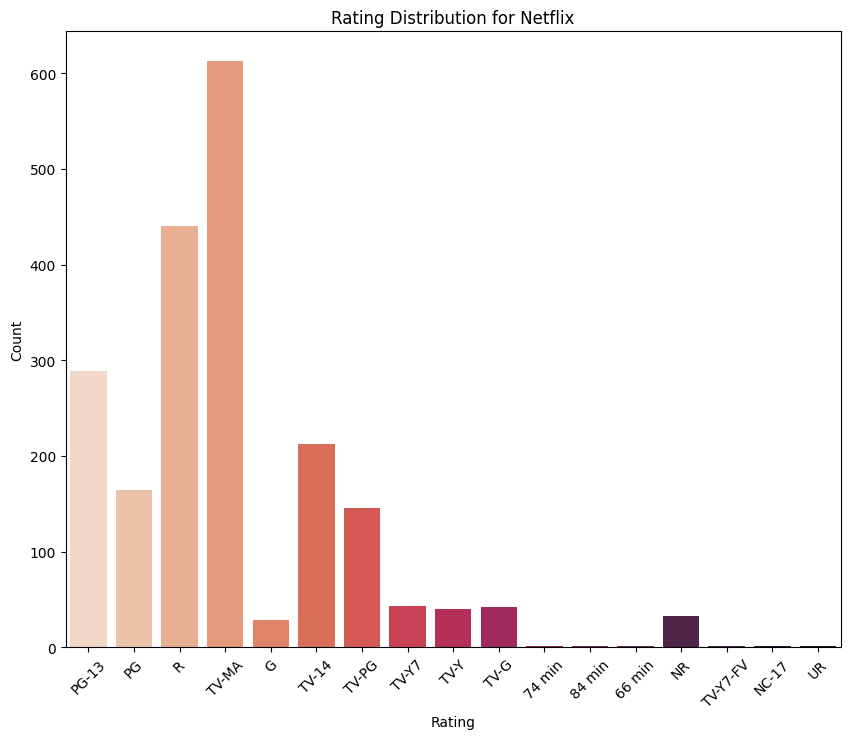

In [16]:
# Rating Plot
plt.figure(figsize=(10, 8))
sns.countplot(x="rating", data=US, palette="rocket_r", hue="rating", legend=False)
plt.title("Rating Distribution for Netflix")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [7]:
#Rating percentage
(US['rating'].value_counts()/US.shape[0])*100

rating
TV-MA       29.786200
R           21.379981
PG-13       14.042760
TV-14       10.349854
PG           7.968902
TV-PG        7.094266
TV-Y7        2.089407
TV-G         2.040816
TV-Y         1.943635
NR           1.603499
G            1.409135
74 min       0.048591
84 min       0.048591
66 min       0.048591
TV-Y7-FV     0.048591
NC-17        0.048591
UR           0.048591
Name: count, dtype: float64

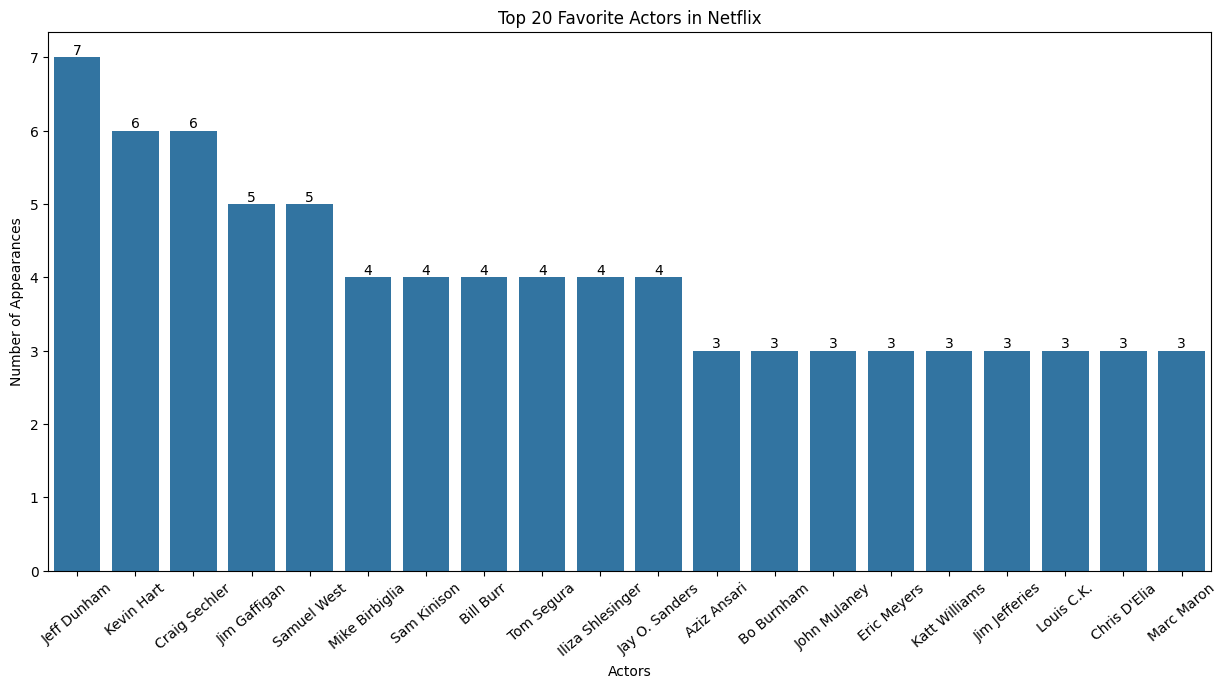

In [17]:
#checking the 20 popular actors in the US
plt.figure(figsize=(15,7))


fav_actor = sns.barplot(x=US.cast.value_counts()[:20].index, y=US.cast.value_counts()[:20].values)

fav_actor.set_xticks(range(len(US.cast.value_counts()[:20].index)))  # Ensure the number of ticks matches
fav_actor.set_xticklabels(US.cast.value_counts()[:20].index, rotation=40)


for container in fav_actor.containers:
    fav_actor.bar_label(container)

# Set title and show the plot
plt.title("Top 20 Favorite Actors in Netflix")
plt.xlabel("Actors")
plt.ylabel("Number of Appearances")
plt.show()